In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.shape        # 数据维度
train.info()       # 字段类型与缺失情况
train.describe()   # 数值型字段统计量

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35000 entries, 0 to 34999
Data columns (total 80 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   BuildingClass            35000 non-null  float64
 1   ZoningClassification     34901 non-null  object 
 2   StreetFrontage           29103 non-null  float64
 3   PlotSize                 35000 non-null  float64
 4   StreetType               35000 non-null  object 
 5   AlleyAccess              162 non-null    object 
 6   PlotShape                35000 non-null  object 
 7   LandFlatness             35000 non-null  object 
 8   UtilitiesAvailable       34950 non-null  object 
 9   PlotConfiguration        35000 non-null  object 
 10  PlotSlope                35000 non-null  object 
 11  BusinessDistrict         35000 non-null  object 
 12  Proximity1               35000 non-null  object 
 13  Proximity2               35000 non-null  object 
 14  BuildingType          

,BuildingClass,StreetFrontage,PlotSize,BuildingGrade,BuildingCondition,ConstructionYear,RenovationYear,ExteriorFinishArea,FinishedBasementArea1,FinishedBasementArea2,...,OpenBalconyArea,EnclosedBalconyArea,3SsnPorch,ScreenedArea,RecreationArea,RecreationQuality,MiscellaneousValue,MonthListed,YearListed,OfficeCategory
count,35000.000000,29103.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,34727.000000,34988.000000,34992.000000,...,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,0.0,35000.000000,35000.000000,35000.000000,35000.000000
mean,57.268069,68.866294,10113.116137,6.081568,5.558214,1971.338257,1984.389257,101.612318,440.563506,49.296785,...,47.364229,22.987977,2.768834,15.875073,2.162784,NaN,54.661601,6.219037,2007.783554,2.015229
std,42.533897,21.136450,7777.883667,1.414518,1.115930,30.348055,20.882223,181.748637,461.814992,169.355395,...,68.344524,65.233948,26.846465,56.037583,34.631572,NaN,611.661245,2.711118,1.317199,1.408027
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,1.000000,2006.000000,0.000000
25%,20.000000,60.000000,7482.457563,5.000000,5.000000,1953.000000,1965.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,4.000000,2007.000000,1.000000
50%,50.000000,68.000000,9467.064382,6.000000,5.000000,1973.000000,1993.000000,0.000000,363.276423,0.000000,...,26.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,6.000000,2008.000000,2.000000
75%,70.000000,78.000000,11577.452419,7.000000,6.000000,2001.000000,2004.000000,162.000000,733.000000,0.000000,...,69.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,8.000000,2009.000000,3.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,...,742.000000,1012.000000,508.000000,576.000000,800.000000,NaN,17000.000000,12.000000,2010.000000,4.000000


In [6]:
train['OfficeCategory'].value_counts(normalize=True)

OfficeCategory
1    0.208971
4    0.202629
3    0.200371
2    0.197314
0    0.190714
Name: proportion, dtype: float64

In [7]:
num_features = train.select_dtypes(include=['float64']).columns

In [10]:
print(len(num_features))

31


<Axes: xlabel='OfficeCategory', ylabel='count'>

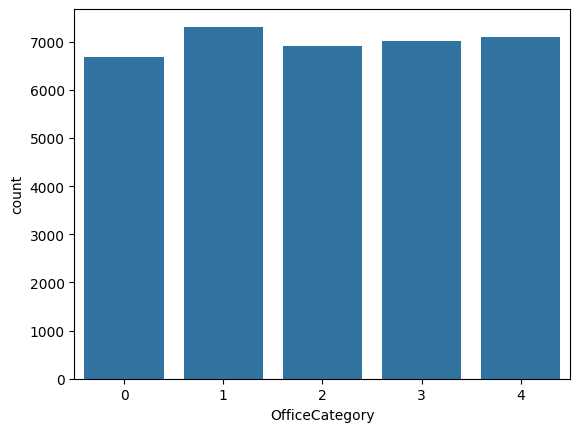

In [11]:
sns.countplot(x='OfficeCategory', data=train)

In [35]:
categorical_cols = train.select_dtypes(include=['object', 'category']).columns
numerical_cols = train.select_dtypes(exclude=['object', 'category']).columns

In [13]:
missing = train.isnull().sum().sort_values(ascending=False)
missing[missing > 0] / len(train)

RecreationQuality          1.000000
MiscellaneousFeature       0.998714
AlleyAccess                0.995371
Perimeter                  0.962771
ExteriorFinishType         0.843000
ConferenceRoomQuality      0.737771
StreetFrontage             0.168486
ParkingQuality             0.108514
ParkingFinish              0.107257
ParkingCondition           0.107114
ParkingType                0.106943
BasementCondition          0.056771
BasementQuality            0.055314
BasementExposure           0.055114
BasementFinishType1        0.054743
ParkingConstructionYear    0.054514
BasementFinishType2        0.052514
ExteriorFinishArea         0.007800
ZoningClassification       0.002829
UtilitiesAvailable         0.001429
FunctionalityRating        0.000686
ListingType                0.000657
ExteriorCovering2          0.000657
ElectricalSystem           0.000629
BasementHalfRestrooms      0.000600
BasementRestrooms          0.000600
ExteriorCovering1          0.000400
UnfinishedBasementArea     0

In [14]:
import matplotlib.pyplot as plt


<Axes: >

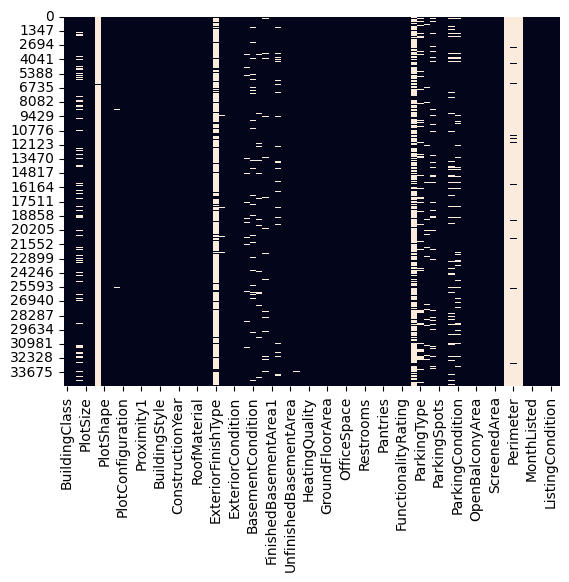

In [15]:
sns.heatmap(train.isnull(), cbar=False)

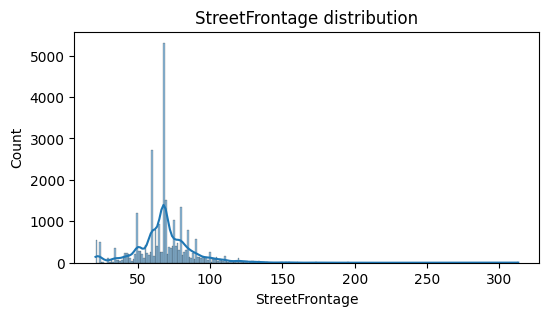

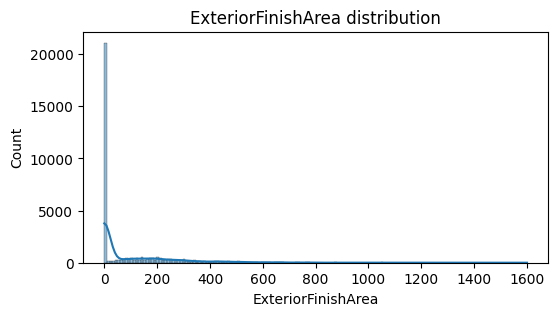

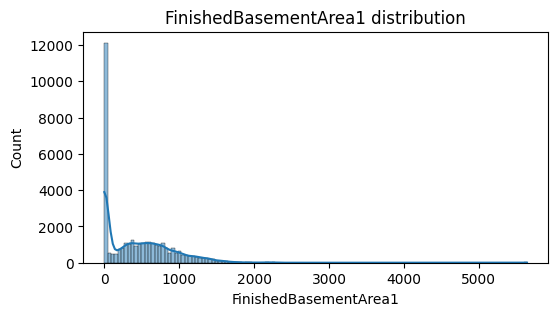

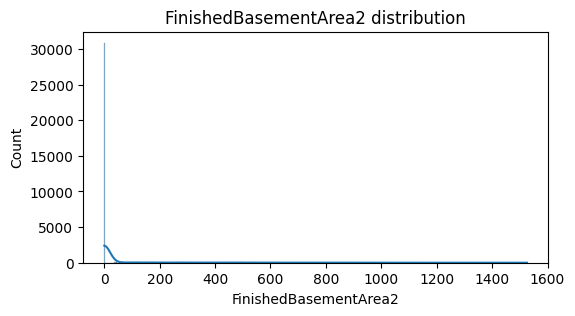

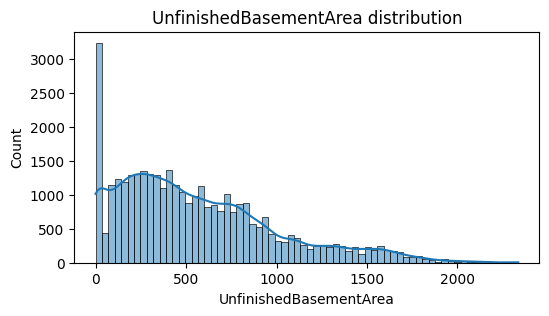

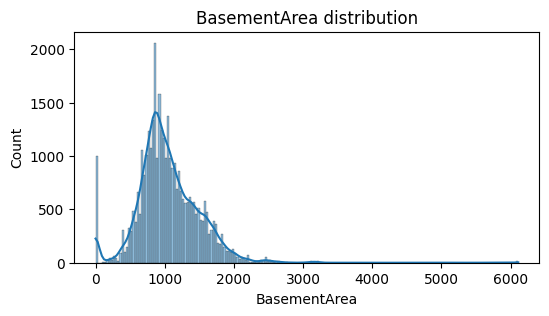

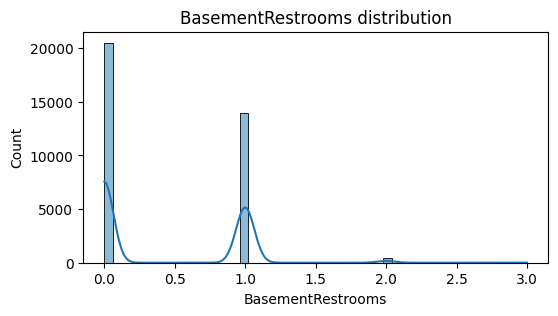

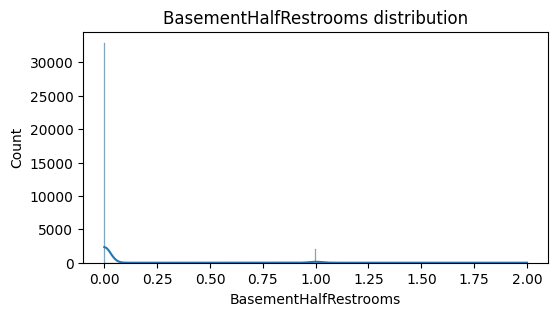

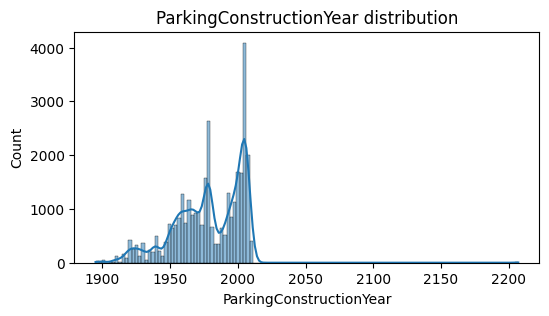

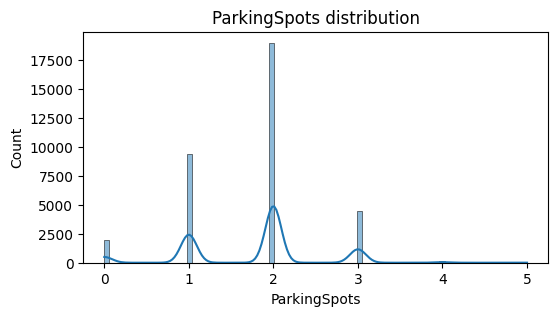

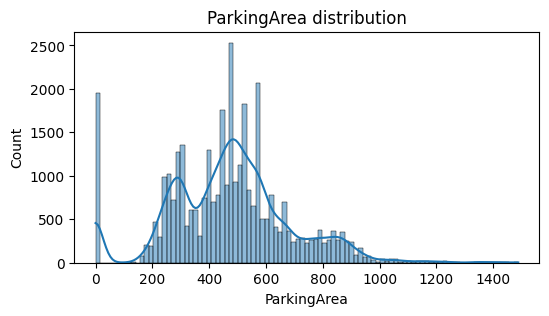

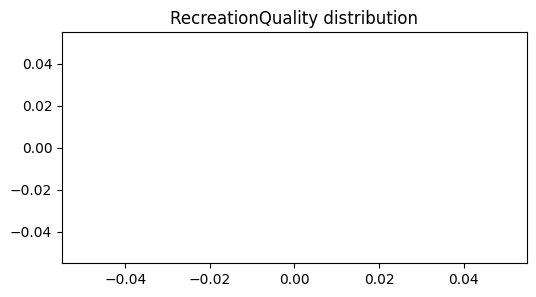

In [16]:
for col in numerical_cols:
    if train[col].isnull().sum() > 0:
        plt.figure(figsize=(6,3))
        sns.histplot(train[col].dropna(), kde=True)
        plt.title(f'{col} distribution')
        plt.show()

In [19]:
for col in categorical_cols:
    if train[col].isnull().sum() > 0:
        print(f"\n🔹 {col} value distribution:")
        print(train[col].value_counts(dropna=False, normalize=True).round(3).head(10))


🔹 ZoningClassification value distribution:
ZoningClassification
RL         0.774
RM         0.159
FV         0.047
RH         0.009
C (all)    0.009
NaN        0.003
Name: proportion, dtype: float64

🔹 AlleyAccess value distribution:
AlleyAccess
NaN     0.995
Grvl    0.003
Pave    0.002
Name: proportion, dtype: float64

🔹 UtilitiesAvailable value distribution:
UtilitiesAvailable
AllPub    0.998
NaN       0.001
NoSeWa    0.001
Name: proportion, dtype: float64

🔹 ExteriorCovering1 value distribution:
ExteriorCovering1
VinylSd    0.349
HdBoard    0.154
MetalSd    0.151
Wd Sdng    0.144
Plywood    0.074
CemntBd    0.043
BrkFace    0.029
WdShing    0.021
AsbShng    0.016
Stucco     0.014
Name: proportion, dtype: float64

🔹 ExteriorCovering2 value distribution:
ExteriorCovering2
VinylSd    0.347
MetalSd    0.153
HdBoard    0.141
Wd Sdng    0.132
Plywood    0.093
CmentBd    0.043
Wd Shng    0.029
BrkFace    0.016
Stucco     0.015
AsbShng    0.013
Name: proportion, dtype: float64

🔹 ExteriorF

In [20]:
for col in categorical_cols:
    if train[col].isnull().sum() > 0:  # 只分析有缺失的列
        value_counts = train[col].value_counts(dropna=False, normalize=True)
        top_cat = value_counts.index[0]
        top_freq = value_counts.iloc[0]
        
        if top_freq <= 0.6:  # 主类别占比 <= 0.6
            print(f"{col:<20} | Top category: {top_cat:<15} | Frequency: {top_freq:.3f}")


ExteriorCovering1    | Top category: VinylSd         | Frequency: 0.349
ExteriorCovering2    | Top category: VinylSd         | Frequency: 0.347
BasementQuality      | Top category: TA              | Frequency: 0.429
BasementFinishType1  | Top category: Unf             | Frequency: 0.288
PantryQuality        | Top category: TA              | Frequency: 0.513
ParkingType          | Top category: Attchd          | Frequency: 0.555
ParkingFinish        | Top category: Unf             | Frequency: 0.398


In [23]:
for col in categorical_cols:
    if train[col].isnull().sum() > 0:
        missing_flag = train[col].isnull().astype(int)
        dist = (
            train.groupby(missing_flag)['OfficeCategory']
            .value_counts(normalize=True)
            .unstack()
            .fillna(0)
        )
        diff = (dist.loc[1] - dist.loc[0]).abs()
        max_diff = diff.max()
        print(f"{col:<20} | Max category diff: {max_diff:.3f}")
        print(dist, "\n")


ZoningClassification | Max category diff: 0.088
OfficeCategory               0         1         2         3         4
ZoningClassification                                                  
0                     0.190797  0.209220  0.197244  0.200195  0.202544
1                     0.161616  0.121212  0.222222  0.262626  0.232323 

AlleyAccess          | Max category diff: 0.061
OfficeCategory         0         1         2         3         4
AlleyAccess                                                     
0               0.129630  0.240741  0.222222  0.234568  0.172840
1               0.190998  0.208824  0.197198  0.200212  0.202767 

UtilitiesAvailable   | Max category diff: 0.098
OfficeCategory            0         1        2         3         4
UtilitiesAvailable                                                
0                   0.19073  0.209013  0.19731  0.200458  0.202489
1                   0.18000  0.180000  0.20000  0.140000  0.300000 

ExteriorCovering1    | Max category di

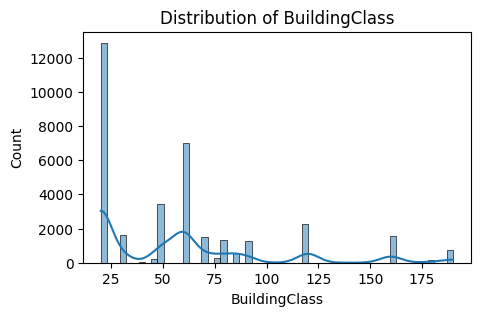

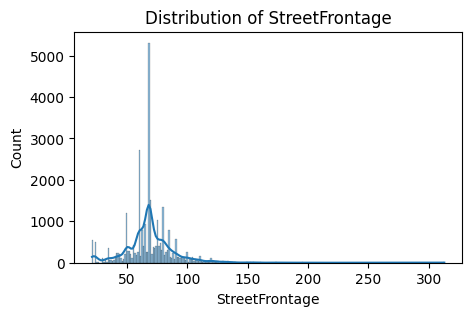

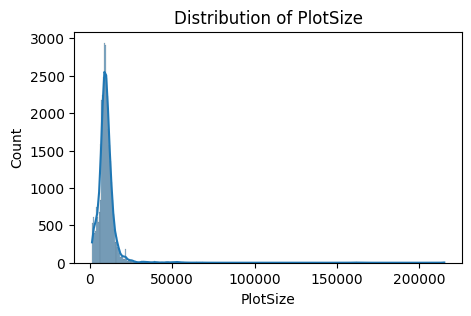

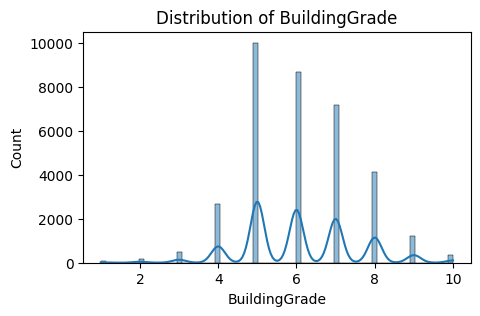

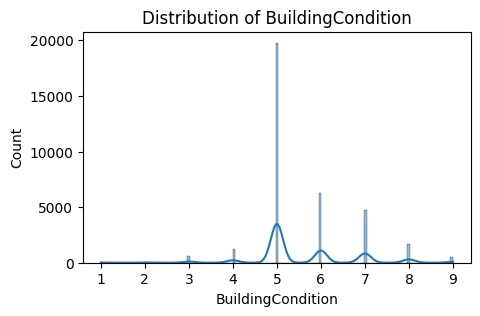

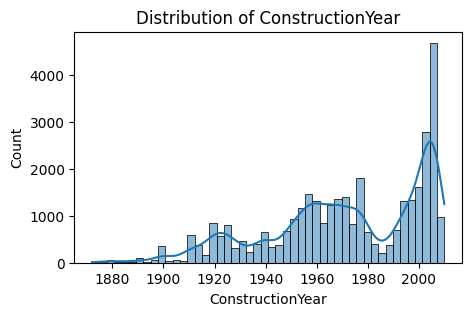

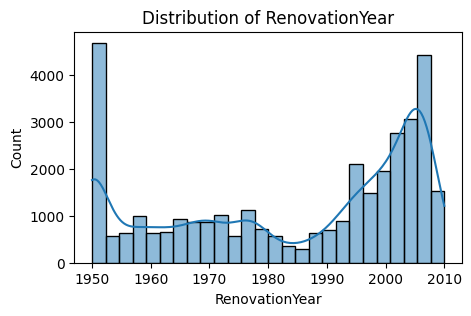

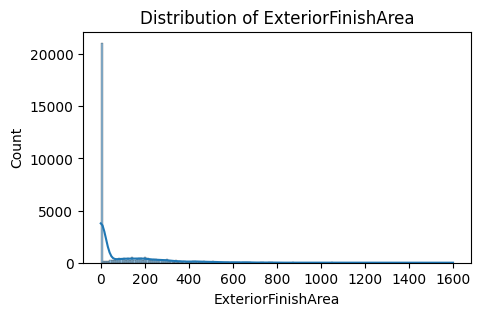

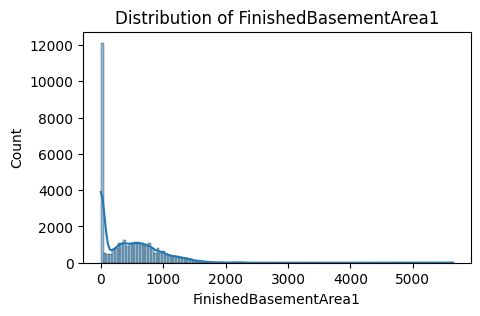

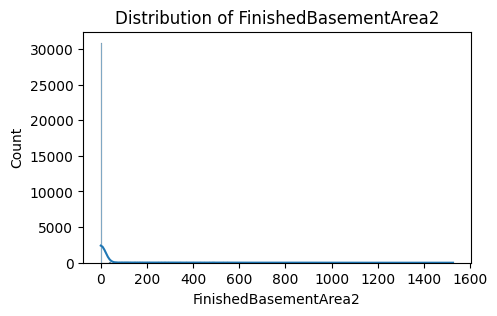

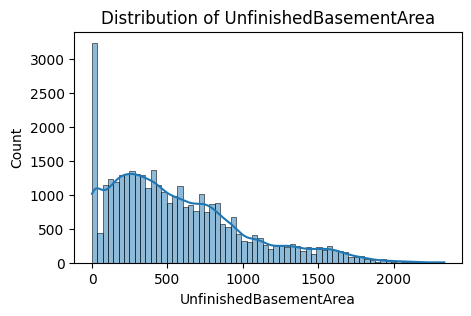

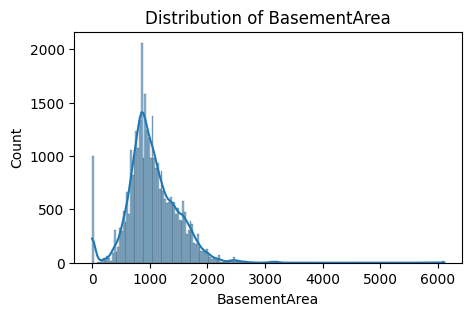

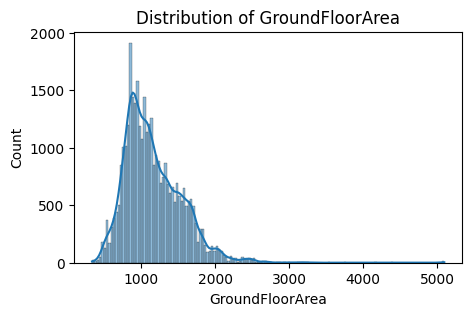

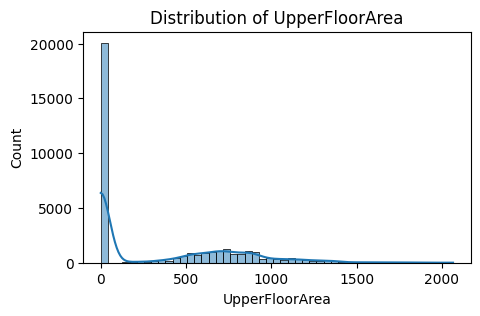

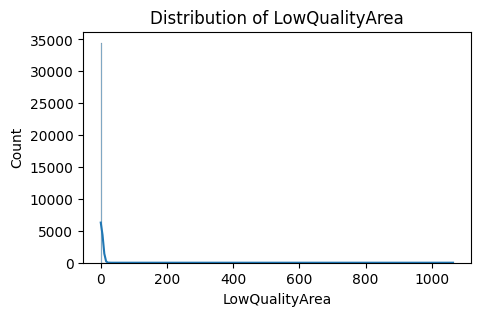

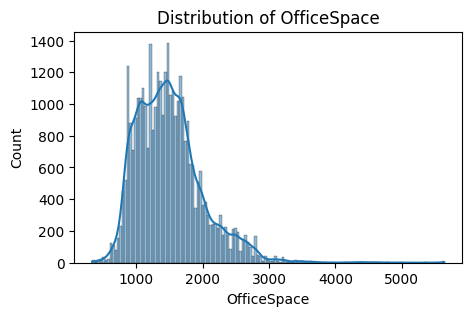

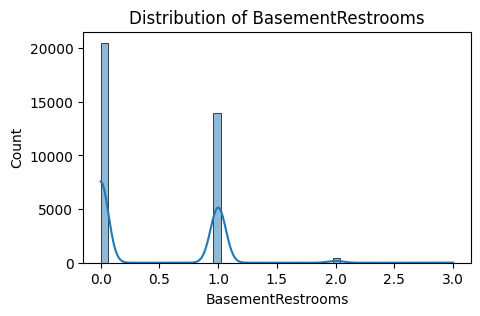

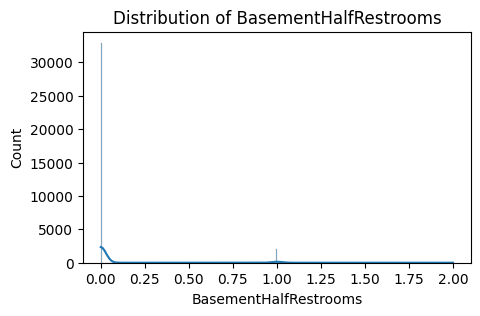

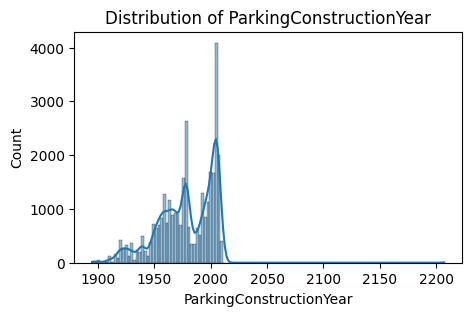

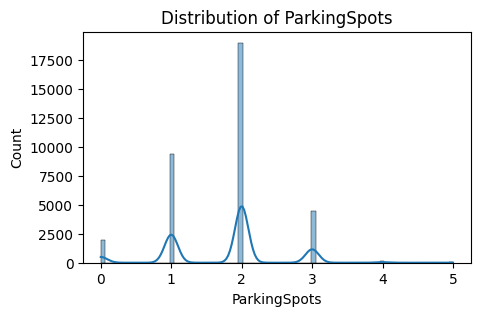

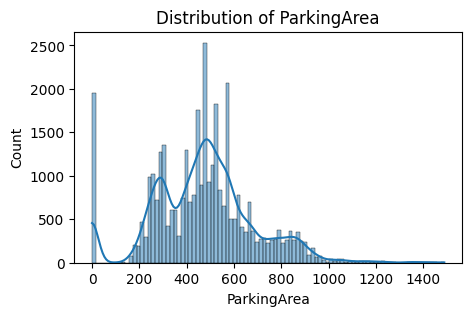

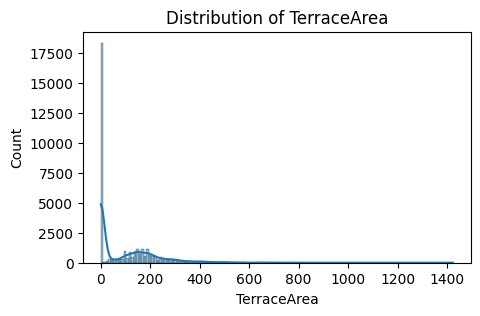

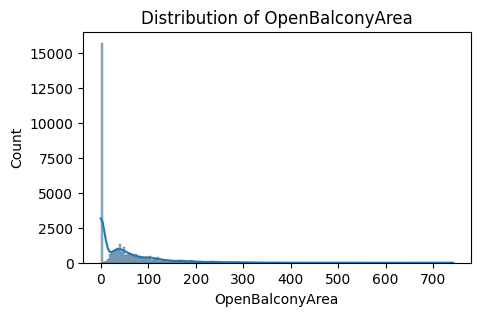

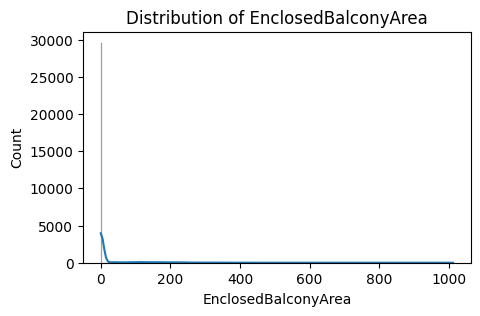

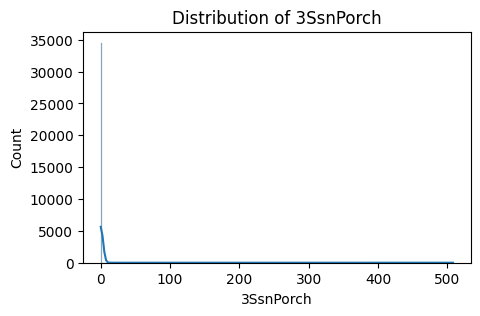

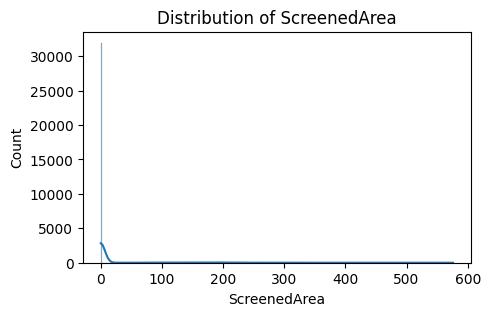

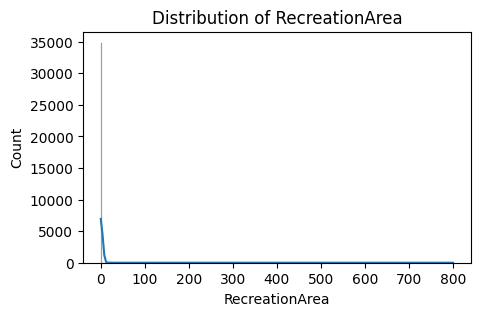

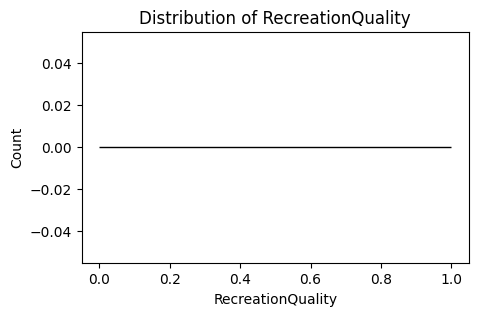

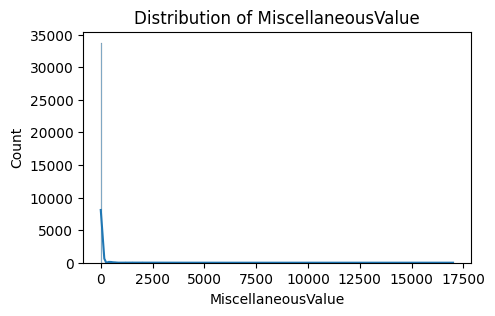

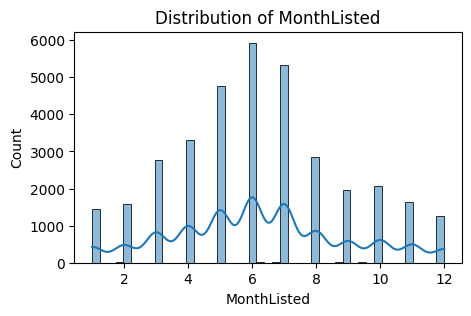

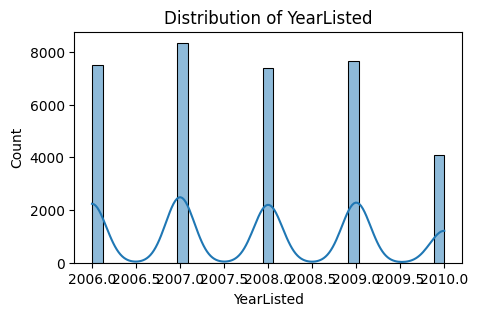

In [26]:

for col in train.select_dtypes(include=['float64']).columns:
    plt.figure(figsize=(5,3))
    sns.histplot(train[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

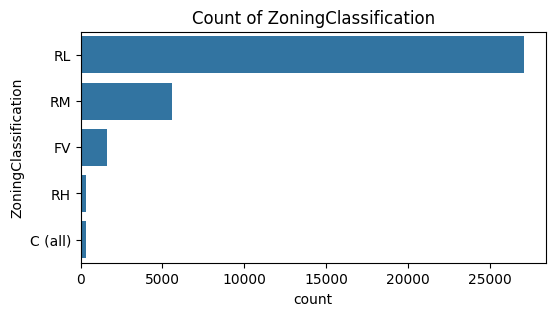

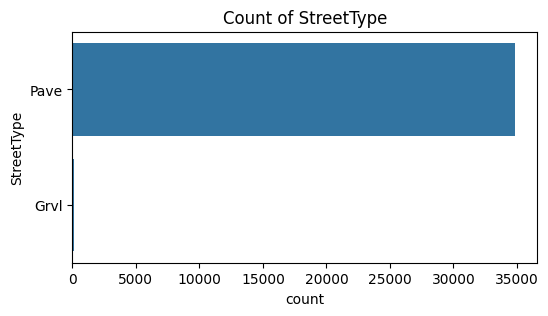

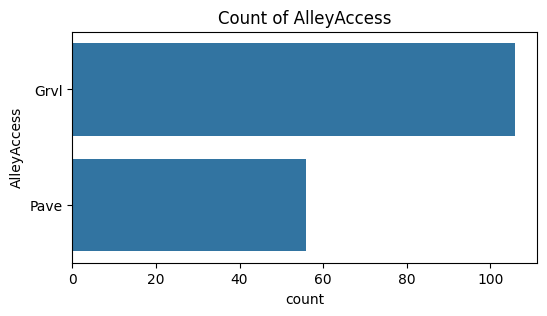

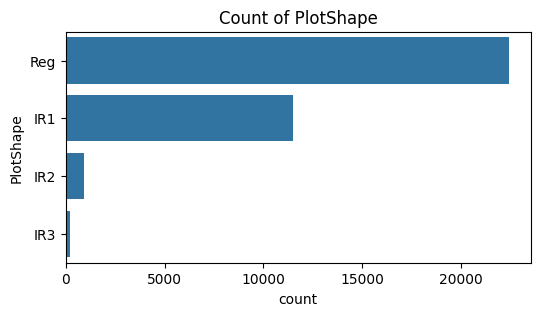

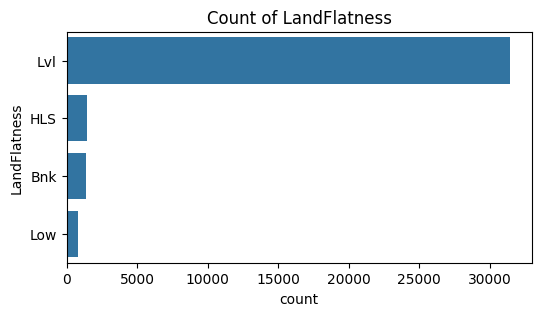

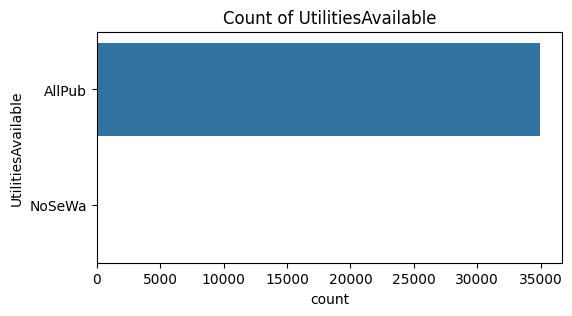

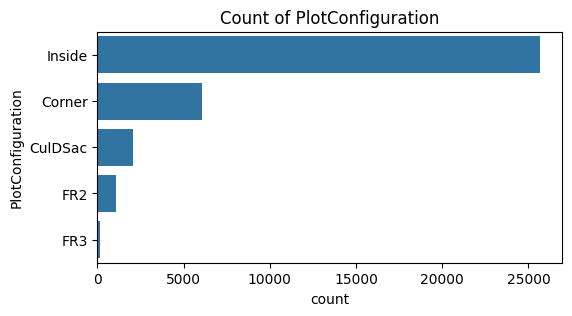

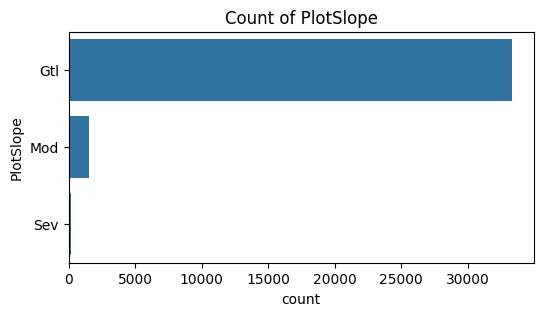

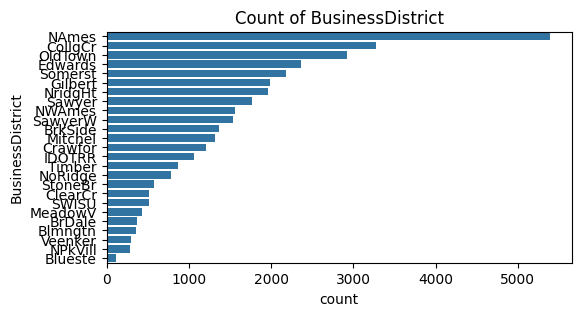

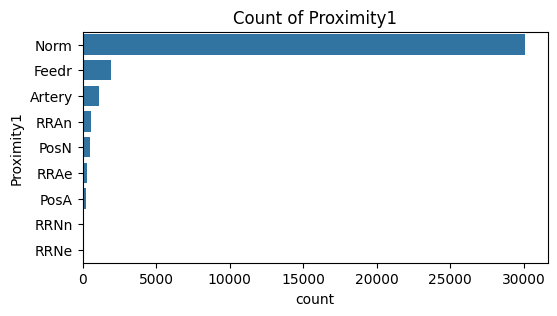

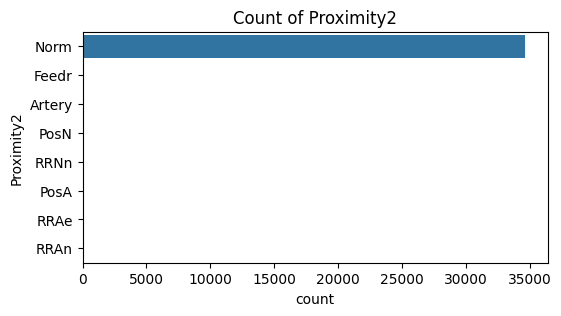

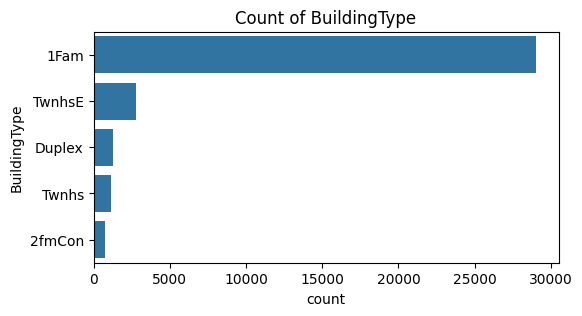

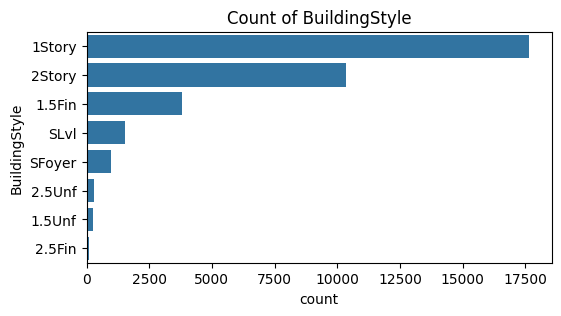

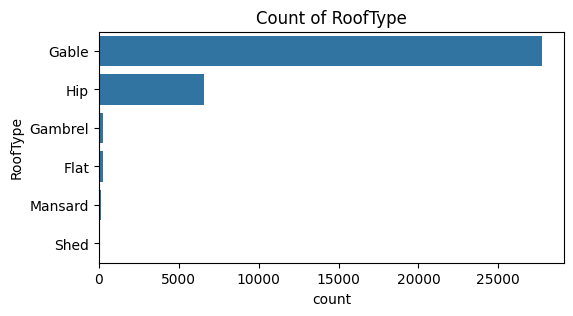

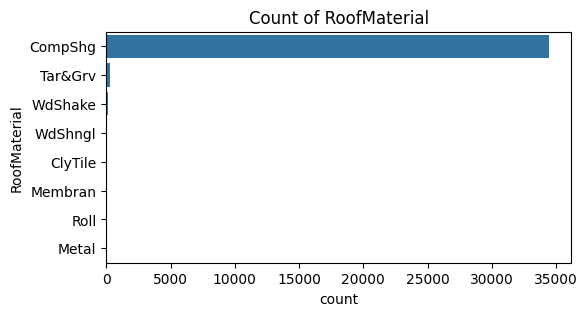

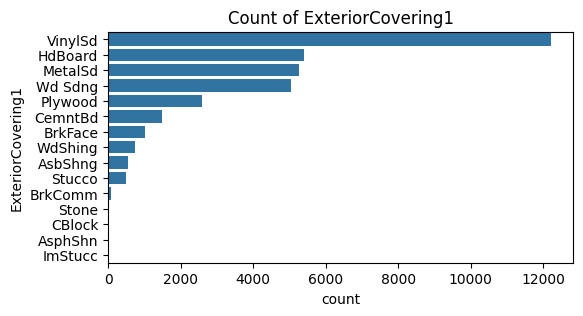

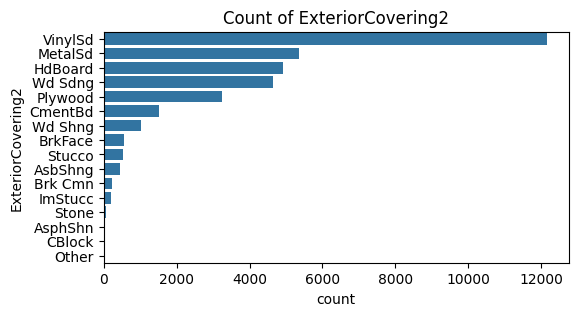

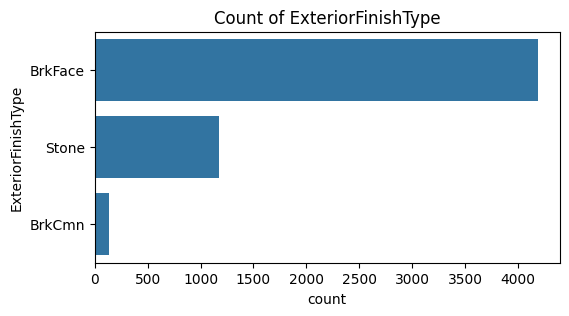

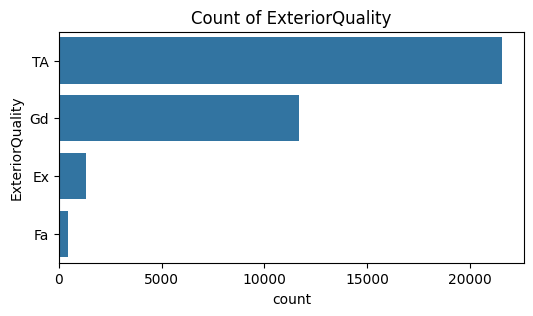

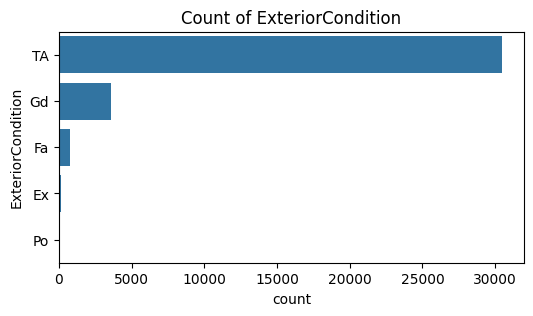

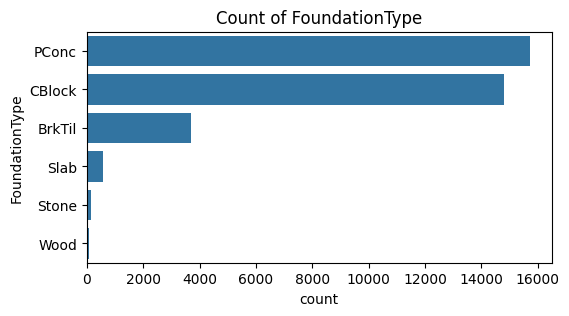

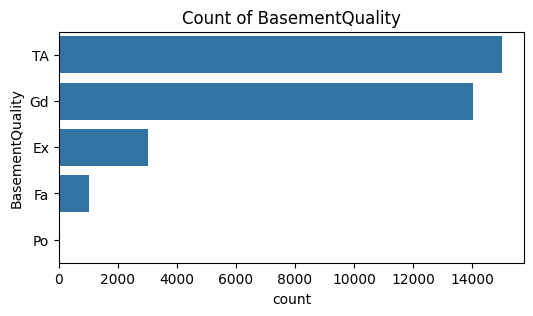

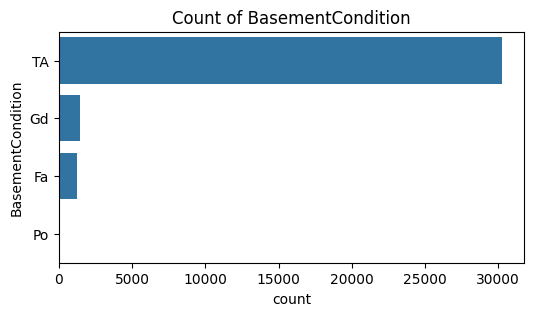

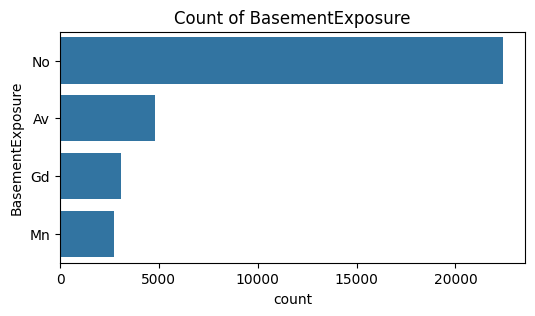

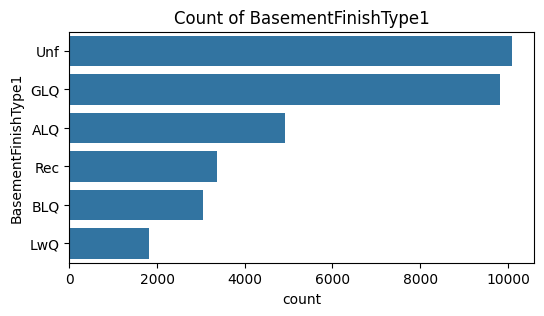

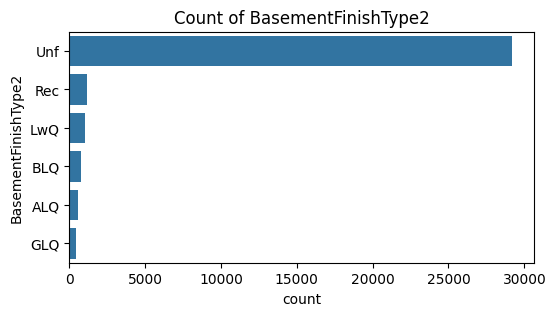

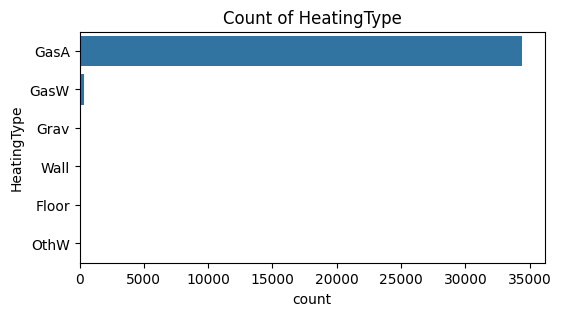

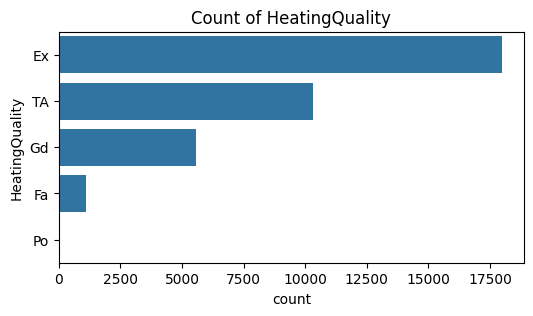

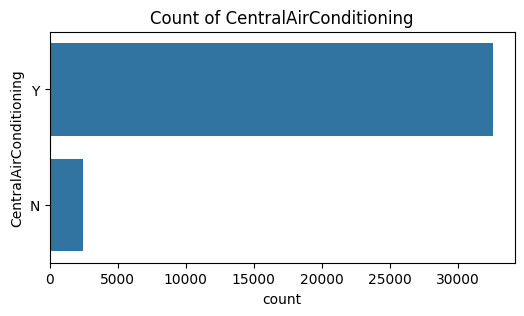

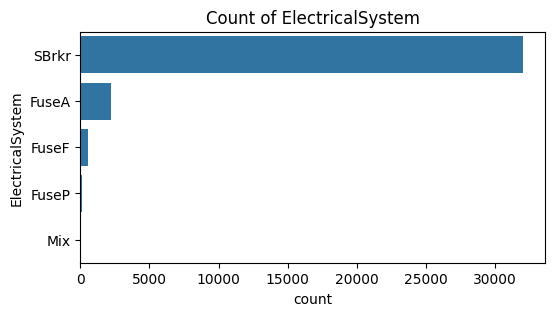

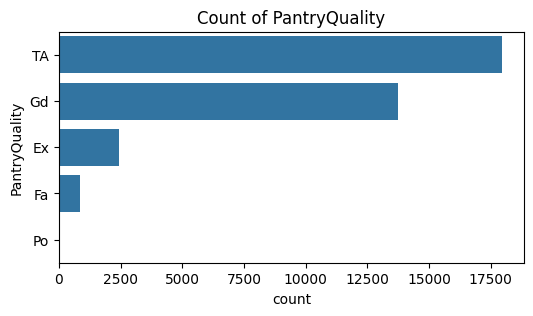

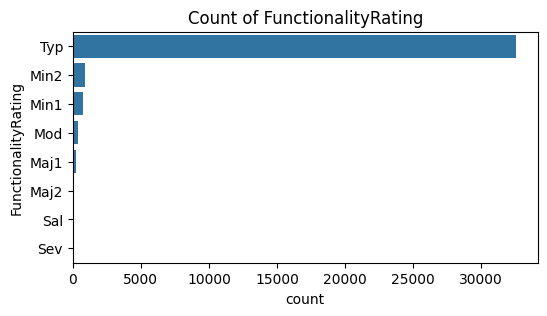

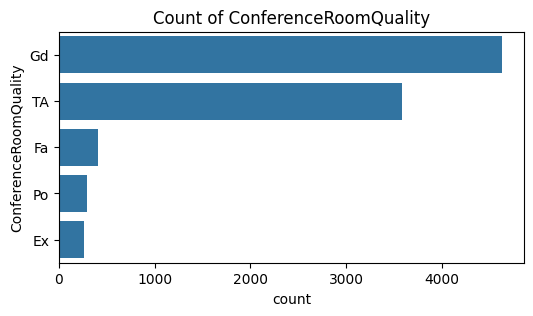

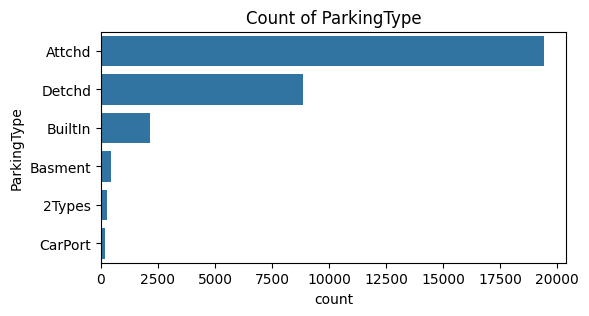

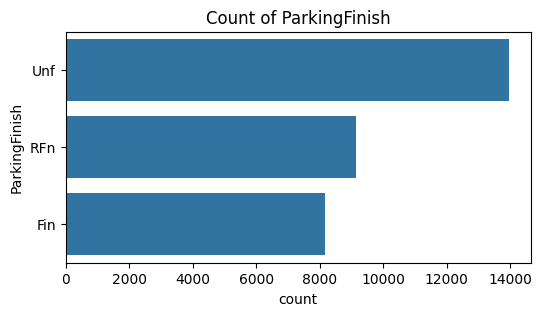

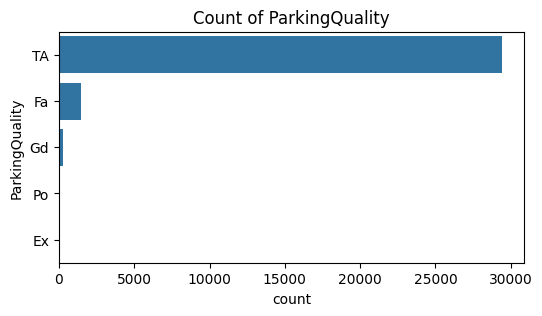

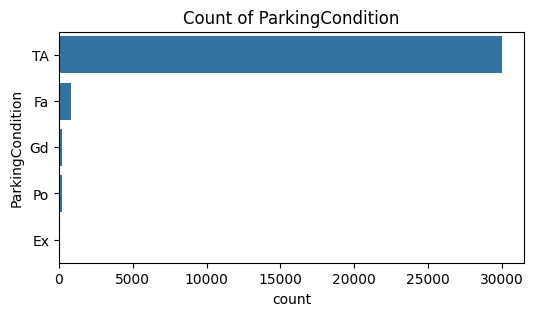

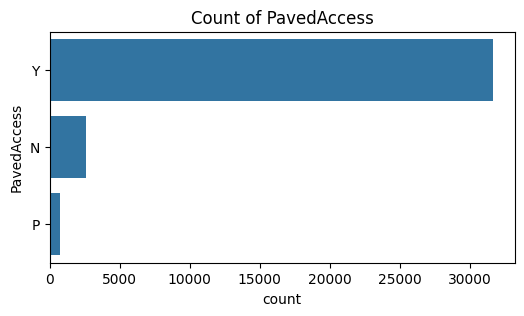

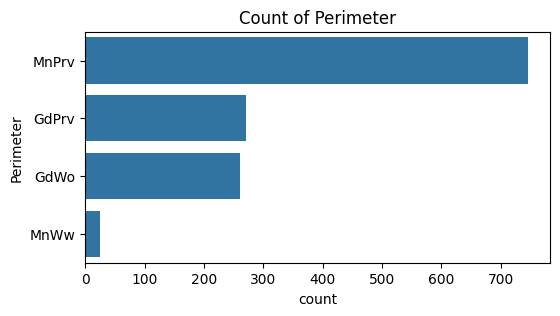

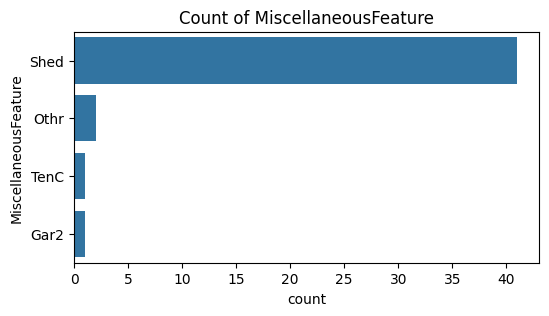

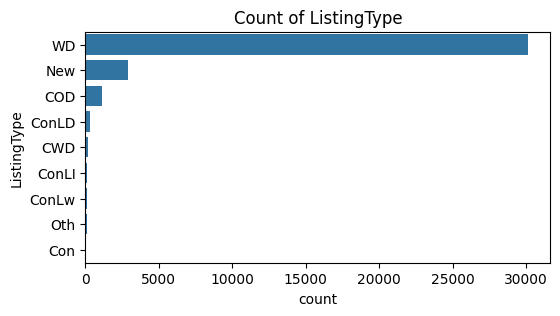

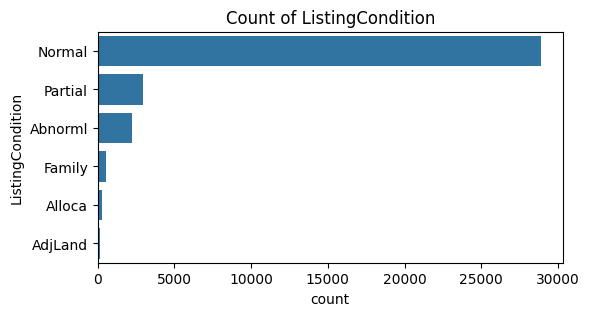

In [30]:
categorical_cols = train.select_dtypes(include=['object','category']).columns

for col in categorical_cols:
    plt.figure(figsize=(6,3))
    sns.countplot(y=col, data=train, order=train[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.show()


In [37]:
import numpy as np
from scipy import stats
z_scores = np.abs(stats.zscore(train[numerical_cols].dropna()))
outlier_count = (z_scores > 3).sum(axis=0)
print("Potential outlier counts per feature:\n", outlier_count)

Potential outlier counts per feature:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0]


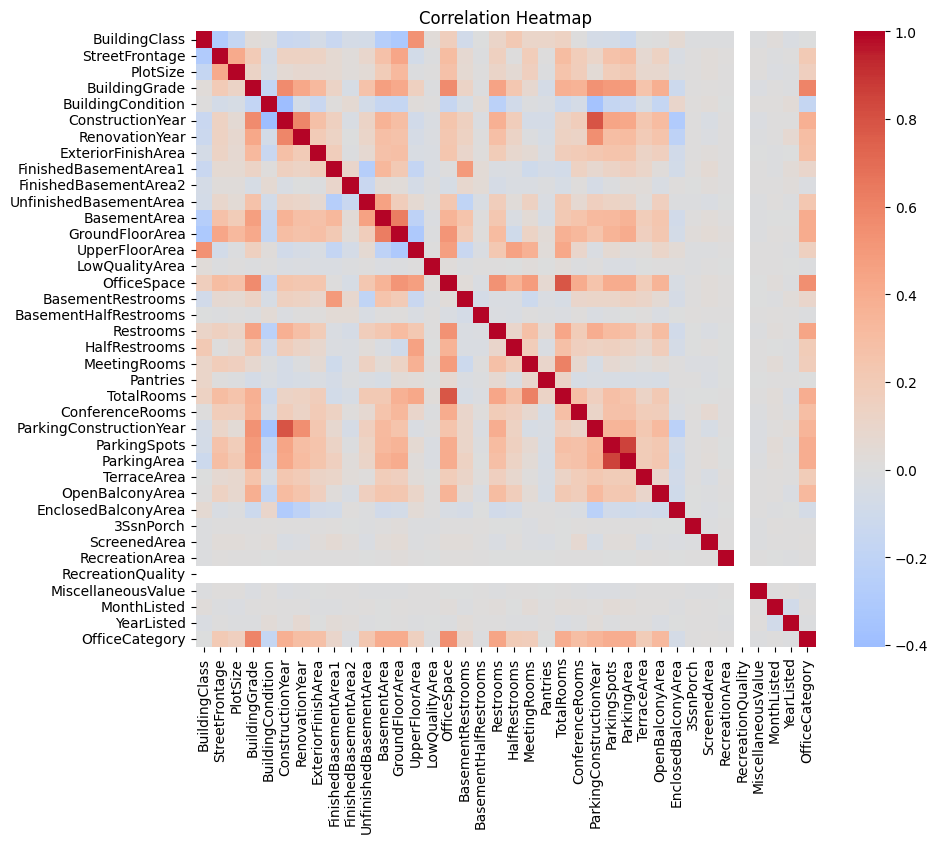

OfficeCategory             1.000000
BuildingGrade              0.597378
OfficeSpace                0.546497
Restrooms                  0.441768
BasementArea               0.402803
GroundFloorArea            0.399082
ParkingSpots               0.395650
TotalRooms                 0.394609
ParkingArea                0.394362
ConstructionYear           0.379582
ParkingConstructionYear    0.343274
OpenBalconyArea            0.320145
ConferenceRooms            0.296303
RenovationYear             0.293484
ExteriorFinishArea         0.276314
UnfinishedBasementArea     0.230719
StreetFrontage             0.206839
TerraceArea                0.197876
HalfRestrooms              0.189728
MeetingRooms               0.178732
PlotSize                   0.155073
UpperFloorArea             0.150572
FinishedBasementArea1      0.100787
BasementRestrooms          0.098784
ScreenedArea               0.013768
MonthListed                0.007047
RecreationArea             0.004915
3SsnPorch                  0

In [41]:
plt.figure(figsize=(10,8))
corr = train[numerical_cols].corr()
sns.heatmap(corr, cmap='coolwarm', center=0, annot=False)
plt.title('Correlation Heatmap')
plt.show()

# 查看与目标变量的相关性（假设目标为 target）
if 'OfficeCategory' in train.columns:
    print(corr['OfficeCategory'].sort_values(ascending=False))


In [5]:
numerical_cols = train.select_dtypes(exclude=['object', 'category']).columns

In [9]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower) | (data[column] > upper)]
    return outliers

for col in numerical_cols:
    Q1, Q3 = train[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
    rate = ((train[col] < lower) | (train[col] > upper)).mean()
    if rate > 0.01:  # 超过1%异常可提示
        print(f"{col}: {rate:.2%} potential outliers")



BuildingClass: 7.08% potential outliers
StreetFrontage: 7.33% potential outliers
PlotSize: 4.14% potential outliers
BuildingCondition: 8.57% potential outliers
ExteriorFinishArea: 7.00% potential outliers
FinishedBasementArea2: 11.80% potential outliers
UnfinishedBasementArea: 2.05% potential outliers
BasementArea: 4.43% potential outliers
GroundFloorArea: 1.46% potential outliers
LowQualityArea: 1.45% potential outliers
OfficeSpace: 2.59% potential outliers
BasementHalfRestrooms: 5.85% potential outliers
MeetingRooms: 2.67% potential outliers
Pantries: 4.56% potential outliers
TotalRooms: 1.77% potential outliers
ParkingArea: 1.45% potential outliers
TerraceArea: 2.21% potential outliers
OpenBalconyArea: 5.78% potential outliers
EnclosedBalconyArea: 15.45% potential outliers
3SsnPorch: 1.32% potential outliers
ScreenedArea: 8.68% potential outliers
MiscellaneousValue: 3.59% potential outliers


<Axes: xlabel='BuildingClass'>

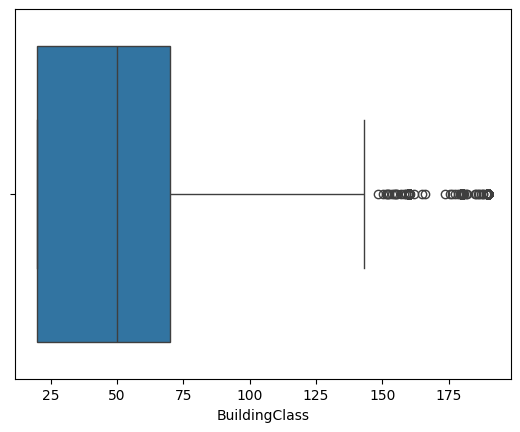

In [21]:
sns.boxplot(x=train['BuildingClass'],orient='h')